In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 載入鳶尾花數據集

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

有4項feature，總共要比6次(C4取2)，太麻煩...

In [15]:
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## 大發現
:Summary Statistics: 寫 petal length  petal width的Class Correlation高，先用這兩個feature預測！

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
x = iris.data
y = iris.target

In [6]:
X = x[:,2:]
Y = y 

### 區分訓練資料、測試資料

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train , x_test , y_train ,y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 0)

### Step1. 打開函數學習機

In [9]:
from sklearn.svm import SVC

In [10]:
clf = SVC(gamma='auto')

### Step2. 訓練

In [11]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step3. 預測

In [12]:
y_predict = clf.predict(x_test)

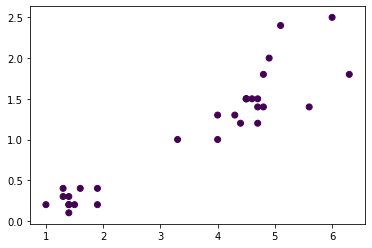

In [13]:
plt.scatter(x_test[:,0] , x_test[:,1] , c=y_predict-y_test)

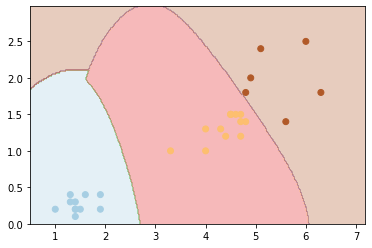

In [14]:
x1 = np.arange(0.5,7.2,0.02)
y1 = np.arange(0,3,0.02)
x2,y2 = np.meshgrid(x1,y1)
P = np.c_[x2.ravel() , y2.ravel()]
z = clf.predict(P)
Z = z.reshape(x2.shape)
plt.contourf(x2 , y2 , Z , cmap='Paired' , alpha=0.3)
plt.scatter(x_test[:,0] , x_test[:,1] , cmap='Paired' , c=y_predict)